In [7]:
import pandas as pd
import glob

In [12]:
path = '/home/educacion/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv("all_data.csv", index=False)


In [25]:
all_data = pd.read_csv("all_data.csv")

nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [30]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [31]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [37]:
results = all_data.groupby('Month').sum()

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Month Number')

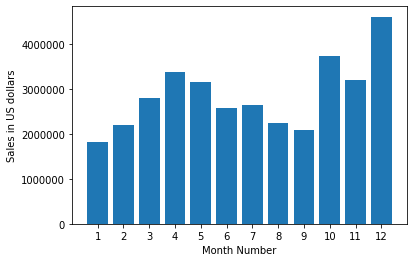

In [40]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in US dollars')
plt.xlabel('Month Number')

In [78]:
def get_city(address):
    return address.split(',')[1]
def get_state(state):
    return state.split(',')[2].split(' ')[1]
all_data['Sum by City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
cities = all_data.groupby('Sum by City').sum()

In [79]:
cities.head()

,Quantity Ordered,Price Each,Month,Sales
Sum by City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
